In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
mn = pd.read_csv(r"MNIST.csv")

In [3]:
mn.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mn.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [5]:
# lets try to do coding in 2 parts
# plot to understand this is image data
# Build the neural nets

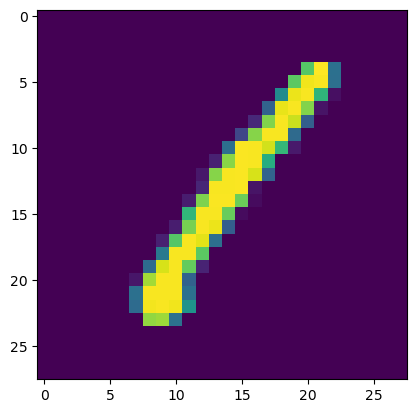

In [6]:
mnist1 = mn.iloc[:, 1::]
abcd = mnist1.iloc[0]
abcd = np.array(abcd)
abcd = abcd.reshape(28 , 28)
plt.imshow(abcd)

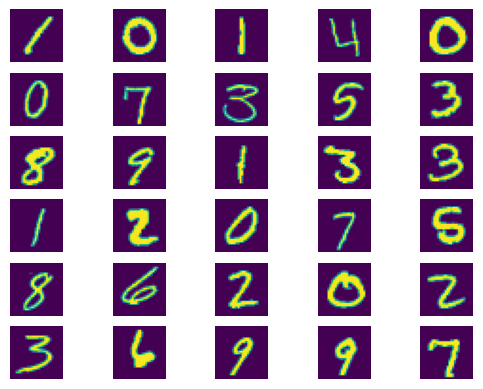

In [7]:
# to see thge image of thne first 30 records

mnist1 = mn.iloc[: , 1:786]
mnist1 = np.array(mnist1)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(mnist1[i , :].reshape(28, 28))
    plt.axis('off')

In [8]:
# noe everyone is agreed thhis is image data

In [9]:
mn.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [10]:
# Sampling

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
mn_train , mn_test = train_test_split(mn , test_size = 0.2)

In [57]:
mn_train_x = mn_train.iloc[:,1::]
mn_train_y = mn_train.iloc[: , 0]

mn_test_x = mn_test.iloc[:,1::]
mn_test_y = mn_test.iloc[: , 0]

In [58]:
mn_train_x = tf.keras.utils.normalize(mn_train_x)
mn_test_x = tf.keras.utils.normalize(mn_test_x)

# this step is optional but recommended

In [61]:
model = tf.keras.models.Sequential()       #Initialize the model
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))    # 1st hidden layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))    # 2nd hidden layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))    # 3rd hidden layer
model.add(tf.keras.layers.Dense(10 , activation = tf.nn.softmax)) # o/p layer and 10 is not an hyperparameter


adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )


In [64]:
mn_train_x = np.array(mn_train_x)
mn_train_y = np.array(mn_train_y)

In [68]:
model.fit(mn_train_x , mn_train_y , epochs = 12 , batch_size =128,validation_split=0.2)

Epoch 1/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9935 - loss: 0.0214 - val_accuracy: 0.9909 - val_loss: 0.0298
Epoch 2/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9963 - loss: 0.0143 - val_accuracy: 0.9896 - val_loss: 0.0294
Epoch 3/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9978 - loss: 0.0108 - val_accuracy: 0.9924 - val_loss: 0.0257
Epoch 4/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9982 - loss: 0.0081 - val_accuracy: 0.9871 - val_loss: 0.0384
Epoch 5/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9962 - loss: 0.0125 - val_accuracy: 0.9893 - val_loss: 0.0332
Epoch 6/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9977 - loss: 0.0092 - val_accuracy: 0.9885 - val_loss: 0.0368
Epoch 7/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9871 - val_loss: 0.0402
Epoch 8/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy:

In [70]:
pred_values = model.predict(mn_test_x)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [72]:
pred_values   # probability value are show because of using the softmax .

array([[3.0809166e-13, 1.6263492e-11, 7.8414830e-09, ..., 1.0000000e+00,
        1.8291198e-10, 1.2334720e-12],
       [3.3401162e-09, 6.6154269e-09, 5.3222269e-02, ..., 5.0730464e-09,
        9.4611418e-01, 3.3170224e-08],
       [3.0099635e-11, 4.4997981e-07, 2.4662254e-08, ..., 6.5007317e-03,
        1.5194281e-10, 4.0086321e-04],
       ...,
       [1.2181411e-14, 3.5569207e-14, 6.1054109e-12, ..., 1.3983831e-12,
        8.9101583e-13, 1.6288493e-07],
       [2.4729353e-12, 3.2833178e-10, 3.5380044e-08, ..., 3.0624501e-06,
        9.2575575e-10, 6.3021848e-06],
       [1.0562805e-12, 2.3229286e-13, 4.8542030e-13, ..., 1.1493001e-08,
        1.1182827e-08, 9.9999988e-01]], dtype=float32)

In [74]:
np.sum(pred_values[0])

1.0

In [76]:
pred_classes = np.argmax(pred_values , axis=1)
pred_classes

array([7, 8, 4, ..., 4, 3, 9], dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(mn_test_y , pred_classes)

array([[873,   0,   1,   3,   2,   1,   4,   0,   3,   0],
       [  0, 927,   5,   1,   3,   0,   1,   2,   3,   0],
       [  0,   1, 801,   3,   5,   0,   0,   7,   0,   0],
       [  1,   0,   4, 812,   0,   4,   0,   2,   4,   1],
       [  0,   0,   1,   0, 848,   0,   4,   1,   1,   5],
       [  5,   2,   2,  15,   1, 713,   3,   1,   4,   2],
       [  3,   1,   3,   1,   0,   6, 808,   1,   2,   0],
       [  2,   1,   7,   1,   2,   1,   0, 849,   2,   2],
       [  1,   6,   8,   8,   3,   9,   3,   4, 739,   1],
       [  1,   1,   2,   8,  30,   4,   0,  10,   7, 781]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score 

In [84]:
accuracy_score(mn_test_y , pred_classes) * 100

97.03571428571428

In [86]:
model.history